In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import class_weight
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras.layers import Conv1D, MaxPool1D, BatchNormalization, Activation, Input, Add, \
                         GlobalAveragePooling1D, Dense, concatenate
from keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.metrics import Recall, Precision
import keras
import time
import os
import keras.backend as K
import tensorflow as tf
from keras import layers
from keras.layers import Conv1D, MaxPooling1D, Concatenate, Activation, BatchNormalization
from keras.metrics import Recall, Precision
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score
import random
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
from sklearn.metrics import roc_curve, auc
from itertools import cycle




In [9]:
from pathlib import Path

    
benign = []
combo = []
junk = []
scan = []
tcp = []
udp = []
miraiack = []
miraiscan = []
miraisyn = []
miraiudp = []
udpplain = []
nums = ["1","2","3","4","5","6","7","8","9"]
for device in nums:
    if Path(device+'.benign.csv').is_file():
        benign_df = pd.read_csv(device+'.benign.csv')
        benign.append(benign_df)
    if Path(device+'.gafgyt.combo.csv').is_file():    
        g_c_df = pd.read_csv(device+'.gafgyt.combo.csv')
        combo.append(g_c_df)
    if Path(device+'.gafgyt.junk.csv').is_file():    
        g_j_df = pd.read_csv(device+'.gafgyt.junk.csv')
        junk.append(g_j_df)
    if Path(device+'.gafgyt.scan.csv').is_file():
        g_s_df = pd.read_csv(device+'.gafgyt.scan.csv')
        scan.append(g_s_df)
    if Path(device+'.gafgyt.tcp.csv').is_file():
        g_t_df = pd.read_csv(device+'.gafgyt.tcp.csv')
        tcp.append(g_t_df)
    if Path(device+'.gafgyt.udp.csv').is_file():
        g_u_df = pd.read_csv(device+'.gafgyt.udp.csv')
        udp.append(g_u_df)
    if Path(device+'.mirai.ack.csv').is_file():
        m_a_df = pd.read_csv(device+'.mirai.ack.csv')
        miraiack.append(m_a_df)
    if Path(device+'.mirai.scan.csv').is_file():
        m_sc_df = pd.read_csv(device+'.mirai.scan.csv')
        miraiscan.append(m_sc_df)
    if Path(device+'.mirai.syn.csv').is_file():
        m_sy_df = pd.read_csv(device+'.mirai.syn.csv')
        miraisyn.append(m_sy_df)
    if Path(device+'.mirai.udp.csv').is_file():
        m_u_df = pd.read_csv(device+'.mirai.udp.csv')
        miraiudp.append(m_u_df)
    if Path(device+'.mirai.udpplain.csv').is_file():
        m_u_p_df = pd.read_csv(device+'.mirai.udpplain.csv')
        udpplain.append(m_u_p_df)


benign_df = pd.concat(benign, axis=0, ignore_index=True)
g_c_df = pd.concat(combo, axis=0, ignore_index=True)
g_j_df = pd.concat(junk, axis=0, ignore_index=True)
g_s_df = pd.concat(scan, axis=0, ignore_index=True)
g_t_df = pd.concat(tcp, axis=0, ignore_index=True)
g_u_df = pd.concat(udp, axis=0, ignore_index=True)
m_a_df = pd.concat(miraiack, axis=0, ignore_index=True)
m_sc_df = pd.concat(miraiscan, axis=0, ignore_index=True)
m_sy_df = pd.concat(miraisyn, axis=0, ignore_index=True)
m_u_df = pd.concat(miraiudp, axis=0, ignore_index=True)
m_u_p_df = pd.concat(udpplain, axis=0, ignore_index=True)

# benign_df = pd.read_csv('5.benign.csv')
# g_c_df = pd.read_csv('5.gafgyt.combo.csv')
# g_j_df = pd.read_csv('5.gafgyt.junk.csv')
# g_s_df = pd.read_csv('5.gafgyt.scan.csv')
# g_t_df = pd.read_csv('5.gafgyt.tcp.csv')
# g_u_df = pd.read_csv('5.gafgyt.udp.csv')
# m_a_df = pd.read_csv('5.mirai.ack.csv')
# m_sc_df = pd.read_csv('5.mirai.scan.csv')
# m_sy_df = pd.read_csv('5.mirai.syn.csv')
# m_u_df = pd.read_csv('5.mirai.udp.csv')
# m_u_p_df = pd.read_csv('5.mirai.udpplain.csv')


In [10]:
benign_df['type'] = 'benign'
m_u_df['type'] = 'mirai_udp'
g_c_df['type'] = 'gafgyt_combo'
g_j_df['type'] = 'gafgyt_junk'
g_s_df['type'] = 'gafgyt_scan'
g_t_df['type'] = 'gafgyt_tcp'
g_u_df['type'] = 'gafgyt_udp'
m_a_df['type'] = 'mirai_ack'
m_sc_df['type'] = 'mirai_scan'
m_sy_df['type'] = 'mirai_syn'
m_u_p_df['type'] = 'mirai_udpplain'

In [11]:
df = pd.concat([benign_df, m_u_df, g_c_df,
                g_j_df, g_s_df, g_t_df,
                g_u_df, m_a_df, m_sc_df,
                m_sy_df, m_u_p_df],
                axis=0, sort=False, ignore_index=True)
df['type'].value_counts()

mirai_udp         1229999
gafgyt_udp         946366
gafgyt_tcp         859850
mirai_syn          733299
mirai_ack          643821
benign             555932
mirai_scan         537979
mirai_udpplain     523304
gafgyt_combo       515156
gafgyt_junk        261789
gafgyt_scan        255111
Name: type, dtype: int64

<AxesSubplot:title={'center':'Class Distribution'}, ylabel='None'>

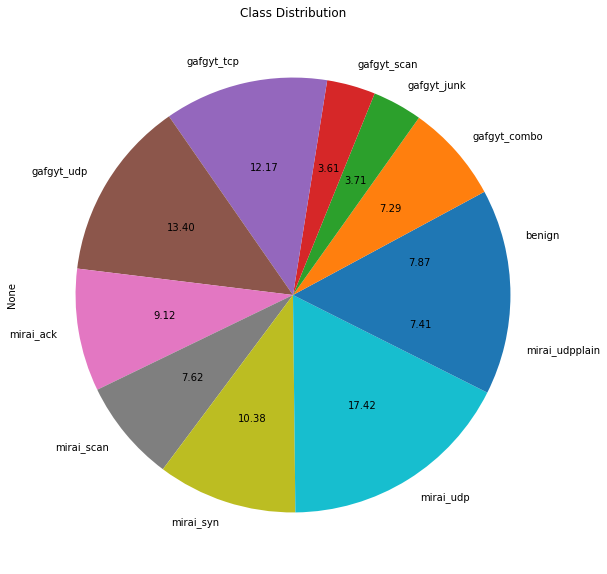

In [12]:
plt.title("Class Distribution")
df.groupby('type').size().plot(kind='pie', autopct='%.2f', figsize=(20,10))

In [13]:
df.info()
#reset indexes
df = df.sample(frac=1).reset_index(drop=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7062606 entries, 0 to 7062605
Columns: 116 entries, MI_dir_L5_weight to type
dtypes: float64(115), object(1)
memory usage: 6.1+ GB


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,1.000000,60.000000,0.000000,1.000000,60.00000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.00000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,gafgyt_udp
1,154.836089,68.499109,46.752673,250.253754,68.50076,46.747720,704.973127,69.002186,44.997675,6656.772173,...,0.0,0.0,1.00000,74.0,0.000000e+00,74.000000,0.000000e+00,0.0,0.0,mirai_syn
2,1.000000,60.000000,0.000000,1.000000,60.00000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.00000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,gafgyt_tcp
3,158.478874,74.009041,0.216897,263.000830,74.01874,0.449405,792.511752,74.033613,0.843802,7163.691401,...,0.0,0.0,1.67847,74.0,9.536743e-07,95.268043,9.094947e-13,0.0,0.0,gafgyt_combo
4,1.000000,60.000000,0.000000,1.000000,60.00000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.00000,60.0,0.000000e+00,60.000000,0.000000e+00,0.0,0.0,gafgyt_udp


In [14]:
#split train test
df = df.dropna()
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['type'])
#features 
features = list(train_df.columns)
features.remove('type')

#label encoder
label_encoder = LabelEncoder()
train_df["type"] = label_encoder.fit_transform(train_df["type"])
test_df["type"] = label_encoder.transform(test_df["type"])

scaler = MinMaxScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])

X_train = train_df[features].values
y_train = train_df["type"].values

X_test = test_df[features].values
y_test = test_df["type"].values

<ipython-input-14-2e13de8179b5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["type"] = label_encoder.fit_transform(train_df["type"])
<ipython-input-14-2e13de8179b5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["type"] = label_encoder.transform(test_df["type"])
<ipython-input-14-2e13de8179b5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [15]:
print(train_df.isnull().sum())

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_magnitude     0
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
type                     0
Length: 116, dtype: int64


In [16]:
print(X_train)
#determination of feature importance 
clf = ExtraTreesClassifier(n_estimators=50, n_jobs=-1)
clf = clf.fit(X_train, y_train)
clf.feature_importances_  


ext=pd.DataFrame(clf.feature_importances_,columns=["extratrees_importance"])
ext = ext.sort_values(['extratrees_importance'], ascending=False)
feature_index = [features[i] for i in list(ext.index)]
ext["Feature_Name"] = feature_index
ext

[[1.54031098e-01 1.00582440e-02 3.94521115e-07 ... 1.89384537e-18
  5.58645511e-01 3.81314241e-01]
 [4.37972544e-01 1.01413316e-02 6.01039253e-06 ... 0.00000000e+00
  5.58645511e-01 3.81314241e-01]
 [0.00000000e+00 5.55111512e-17 0.00000000e+00 ... 0.00000000e+00
  5.58645511e-01 3.81314241e-01]
 ...
 [4.70944099e-01 4.18320301e-03 9.68410137e-05 ... 0.00000000e+00
  5.58645511e-01 3.81314241e-01]
 [3.14149719e-01 1.96532365e-01 1.22600373e-01 ... 0.00000000e+00
  5.58645511e-01 3.81314241e-01]
 [2.44022277e-01 1.25108145e-01 1.13205710e-01 ... 0.00000000e+00
  5.58645511e-01 3.81314241e-01]]


,extratrees_importance,Feature_Name
13,4.382202e-02,MI_dir_L0.01_mean
28,3.942991e-02,H_L0.01_mean
24,3.766982e-02,H_L0.1_weight
9,3.725655e-02,MI_dir_L0.1_weight
27,3.615322e-02,H_L0.01_weight
...,...,...
93,3.014009e-06,HpHp_L3_pcc
99,1.689325e-06,HpHp_L1_covariance
42,8.917749e-07,HH_L3_covariance
92,5.254657e-07,HpHp_L3_covariance


In [17]:
model = SelectFromModel(clf, prefit=True)
X_train = model.transform(X_train)
X_test = model.transform(X_test)
X_test.shape 

(1412522, 41)

In [18]:
X_train = X_train.reshape((-1, X_train.shape[-1], 1))
X_test = X_test.reshape((-1, X_test.shape[-1], 1))
class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train)

class_weights = {k: v for k,v in enumerate(class_weights)}
class_weights

{0: 1.1549179867114863,
 1: 1.2463306035790112,
 2: 2.4525691039053434,
 3: 2.516764744792713,
 4: 0.7467058207826947,
 5: 0.6784424106417574,
 6: 0.9972566143164737,
 7: 1.1934579200386632,
 8: 0.8755708365792251,
 9: 0.5219964654435625,
 10: 1.226926044386267}

In [19]:
input_shape = X_train.shape[1:]
nb_classes = len(label_encoder.classes_)

In [20]:
def convert_to_categorical(y, nb_classes):
    return to_categorical(y, num_classes=nb_classes)

def iid_data_indices(labels: np.ndarray, nb_clients: int):
    data_len = len(labels)
    indices = np.arange(data_len)
    np.random.shuffle(indices)
    chunks = np.array_split(indices, nb_clients)
    return chunks

In [21]:
def non_iid_data_indices(labels: np.ndarray, nb_clients: int):
    data_len = len(labels)
    indices = np.arange(data_len)
    indices = indices[labels.argsort()]
    
    indices_end_list = []
    for i in range(0, nb_clients-1):
        y = random.randrange(data_len-2)
        indices_end_list.append(y)
    
    indices_end_list.sort()
    indices_end_list = indices_end_list+[data_len]
    
    indices_for_users = []
    prev_index = 0
#     sum_res = 0
    for curr_index in indices_end_list:
        indices_for_users.append(indices[prev_index:curr_index])
        prev_index = curr_index
#         sum_res += len(indices_for_users[-1])
#     print(sum_res, data_len)
    return indices_for_users

def sample(y:np.ndarray, sampling_technique: str, nb_clients: int):
    if sampling_technique.lower() == "iid":
        sampler_fn = iid_data_indices
    else:
        sampler_fn = non_iid_data_indices
    client_data_indices = sampler_fn(y, nb_clients)
    return client_data_indices

In [22]:
def assign_data_to_clients(clients: dict, X:np.ndarray, y:np.ndarray, nb_classes:int, sampling_technique: str):
    sampled_data_indices = sample(y, sampling_technique, len(clients.keys()))
    for client_name, data_indices in zip(clients.keys(), sampled_data_indices):
        X = X_train[data_indices]
        y = y_train[data_indices]
        y = convert_to_categorical(y, nb_classes)
        clients[client_name] = list(zip(X, y))
    return clients

def create_clients(X, y, nb_classes, sampling_technique, num_clients=10, initial='clients'):
    #create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]
    clients = {client_names[i] : [] for i in range(len(client_names))}
    return assign_data_to_clients(clients, X, y, nb_classes, sampling_technique)

def batch_data(data_shard, batch_size=64):
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    del data_shard

    len_label = len(label)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    del data, label
    return dataset.shuffle(len_label).batch(batch_size)

In [23]:
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

class INCEPTION_Block(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(INCEPTION_Block, self).__init__(**kwargs)
        self.kernel_size = 50
#         f1, f2_in, f2_out, f3_in, f3_out, f4_out = (128, 128, 192, 32, 96, 64)
        f1, f2_in, f2_out, f3_in, f3_out, f4_out = (16, 16, 24, 4, 12, 8)
        kernel_size_s = [10, 30, 50]
        
        # 1x1 conv
        self.conv_1_1 = Conv1D(f1, kernel_size_s[0], padding='same', activation='relu')
        
        # 3x3 conv
        self.conv_1_2 = Conv1D(f2_in, kernel_size_s[0], padding='same', activation='relu')
        self.conv_3_2 = Conv1D(f2_out, kernel_size_s[1], padding='same', activation='relu')
        
        # 5x5 conv
        self.conv_1_3 = Conv1D(f3_in, kernel_size_s[0], padding='same', activation='relu')
        self.conv_5_3 = Conv1D(f3_out, kernel_size_s[2], padding='same', activation='relu')
        
        # 3x3 max pooling
        self.pool = MaxPooling1D(kernel_size_s[1], strides=1, padding='same')
        self.conv_final = Conv1D(f4_out, kernel_size_s[0], padding='same', activation='relu')
        
        # concatenate filters, assumes filters/channels last
        self.concatenate = Concatenate(axis=-1)
        
        self.batch_normalization = BatchNormalization()
        self.relu_activation = Activation(activation='relu')
        
    def call(self, layer_in):
        # 1x1 conv
        conv1 = self.conv_1_1(layer_in)
        
        # 3x3 conv
        conv3 = self.conv_1_2(layer_in)
        conv3 = self.conv_3_2(conv3)
        
        # 5x5 conv
        conv5 = self.conv_1_3(layer_in)
        conv5 = self.conv_5_3(conv5)
        
        # 3x3 max pooling
        pool = self.pool(layer_in)
        pool = self.conv_final(pool)
        
        # concatenate filters, assumes filters/channels last
        layer_out = self.concatenate([conv1, conv3, conv5, pool])
        
        layer_out = self.batch_normalization(layer_out)
        layer_out = self.relu_activation(layer_out)
        
        return layer_out

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = keras.models.Sequential(
        [INCEPTION_Block(),
         INCEPTION_Block(),
         INCEPTION_Block()])(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

class TransformerEncoder(layers.Layer):
    def __init__(self, head_size, num_heads, neurons):
        super(TransformerEncoder, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=head_size)
        self.ffn = keras.models.Sequential(
            #[layers.Dense(neurons, activation="relu"), layers.Dense(head_size),]
            [
                INCEPTION_Block(),
                INCEPTION_Block(),
                INCEPTION_Block(),
            ]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(0.1)
        self.dropout2 = layers.Dropout(0.1)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

def get_model(input_shape, nb_classes) -> tf.keras.Model:
    head_size=64 # Embedding size for attention
    num_heads=3 # Number of attention heads
    ff_dim=128 # Hidden layer size in feed forward network inside transformer
    num_transformer_blocks=1
    mlp_units=[32]
    mlp_dropout=0.1
    dropout=0.1

    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(nb_classes, activation="softmax")(x)

    return keras.Model(inputs, outputs)

In [24]:
learning_rate = 1e-2
comms_round = 10
loss='categorical_crossentropy'
metrics = ["accuracy", Recall(), Precision(), f1_score]
# optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=learning_rate)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

#initialize global model
global_model = get_model(input_shape, nb_classes)

global_model.summary()

plot_model(global_model, to_file='global_model.png', show_shapes=True, show_layer_names=True)
BATCH_SIZE = 64
sampling_technique = "iid"

# create clients
clients_batched = create_clients(X_train, y_train, nb_classes, sampling_technique, num_clients=10, initial='client')

del X_train, y_train

# process and batch the training data for each client
client_set = {k: {} for k in clients_batched.keys()}

for (client_name, data) in clients_batched.items():
    client_set[client_name]["dataset"] = batch_data(data, BATCH_SIZE)
    local_model = get_model(input_shape, nb_classes)
    local_model.compile(loss=loss, 
                      optimizer=optimizer, 
                      metrics=metrics)
    client_set[client_name]["model"] = local_model


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 41, 1)]      0                                            
__________________________________________________________________________________________________
multi_head_attention (MultiHead (None, 41, 1)        1345        input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 41, 1)        0           multi_head_attention[0][0]       
__________________________________________________________________________________________________
layer_normalization (LayerNorma (None, 41, 1)        2           dropout[0][0]                

In [25]:
#process and batch the test set 

y_test = convert_to_categorical(y_test, nb_classes)

test_batched = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(len(y_test))

del X_test, y_test

In [26]:
def weight_scalling_factor(clients, client_name):
    client_names = list(clients.keys())
    #get the bs
    bs = list(clients[client_name]["dataset"])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients[client_name]["dataset"]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients[client_name]["dataset"]).numpy()*bs
    return local_count/global_count

def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final

def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)
        
    return avg_grad

def test_model(X_test, y_test,  model, comm_round):
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    loss = cce(y_test, logits)
    y_hat = np.argmax(logits, axis=1)
    y_true = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(logits, axis=1))
    
    r = Recall()
    r.update_state(y_test, logits)
    recall = r.result().numpy()
    
    p = Precision()
    p.update_state(y_test, logits)
    precision = p.result().numpy()
    
    f = f1_score(y_test, logits)
    f1 = f.numpy()
    
    print('comm_round: {} | global_loss: {} | global_accuracy: {:.4} | global_recall: {:.4} | global_precision: {:.4} | global_f1_score: {:.4} \n'.format(comm_round, loss, accuracy, recall, precision, f1))
    return loss, accuracy, precision, recall, f1

def train_client(client, global_weights, class_weights):
    client_set[client]["model"] = client_set[client]["model"]

    #set local model weight to the weight of the global model
    client_set[client]["model"].set_weights(global_weights)

    #fit local model with client's data
    print(f"Round: {comm_round} | Client: {client} training")
    client_set[client]["model"].fit(client_set[client]["dataset"], epochs=1, verbose=1, class_weight=class_weights)

    #scale the model weights and add to list
    scaling_factor = weight_scalling_factor(client_set, client)
    scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
    return scaled_weights



In [ ]:
import random 

#commence global training loop
global_loss=[]
global_accuracy=[]
global_precision=[]
global_recall=[]
global_f1=[]
best_global_accuracy = 0

for comm_round in range(comms_round):            
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()
    
    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(client_set.keys())
    random.shuffle(client_names)
    
    #loop through each client and create new local model
    for client in client_names:            
        scaled_weights = train_client(client, global_weights, class_weights)
            
        scaled_local_weight_list.append(scaled_weights)
        
    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)
    
    #update global model 
    global_model.set_weights(average_weights)

    #test global model and print out metrics after each communications round
    g_accuracy = 0
    for(x_batch, y_batch) in test_batched:
        g_loss, g_accuracy, g_precision, g_recall, g_f1 = test_model(x_batch, y_batch, global_model, comm_round)
        global_loss.append(g_loss)
        global_accuracy.append(g_accuracy)
        global_precision.append(g_precision)
        global_recall.append(g_recall)
        global_f1.append(g_f1)
        
    if g_accuracy > best_global_accuracy:
        best_global_accuracy = g_accuracy
        global_model.save_weights('global_model_best_weights.h5')
        print("New Weights Saved")

Round: 0 | Client: client_7 training
8829/8829 [==============================] - 940s 59ms/step - loss: 0.4844 - accuracy: 0.6983 - recall: 0.6533 - precision: 0.7264 - f1_score: 0.6781
Round: 0 | Client: client_1 training
8829/8829 [==============================] - 524s 59ms/step - loss: 0.4369 - accuracy: 0.7085 - recall: 0.7042 - precision: 0.7388 - f1_score: 0.7011
Round: 0 | Client: client_10 training
8829/8829 [==============================] - 103s 11ms/step - loss: 0.4367 - accuracy: 0.7095 - recall: 0.7066 - precision: 0.7383 - f1_score: 0.7028
Round: 0 | Client: client_9 training
8829/8829 [==============================] - 104s 11ms/step - loss: 0.4383 - accuracy: 0.7095 - recall: 0.7079 - precision: 0.7385 - f1_score: 0.7034
Round: 0 | Client: client_4 training
8829/8829 [==============================] - 100s 11ms/step - loss: 0.4373 - accuracy: 0.7105 - recall: 0.7100 - precision: 0.7397 - f1_score: 0.7041
Round: 0 | Client: client_5 training
8829/8829 [================

In [ ]:
global_model.load_weights("global_model_best_weights.h5")
loss, accuracy, precision, recall, f1_score = test_model(x_batch, y_batch, global_model, comm_round)
print("loss : ", loss.numpy())
print("accuracy : ", accuracy)
print("precision : ", precision)
print("recall : ", recall)
print("f1_score : ", f1_score)

In [ ]:
for(x_batch, y_batch) in test_batched:
    logits = global_model.predict(x_batch)
    y_hat = np.argmax(logits, axis=1)
    y_true = np.argmax(y_batch, axis=1)

In [ ]:
def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))

    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))

In [ ]:
def ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, n_classes):    
    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_ohe[:, i], y_hat_ohe[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
                                  
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_ohe.ravel(), y_hat_ohe.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure(figsize=(20,20))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(label_encoder.classes_[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("multiclass characteristic")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
y_true_ohe = to_categorical(y_true, num_classes=len(label_encoder.classes_))
y_hat_ohe =  to_categorical(y_hat, num_classes=len(label_encoder.classes_))

In [ ]:
ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, len(label_encoder.classes_))


In [ ]:
print_score(y_hat, y_true, label_encoder)

In [ ]:
figure, axis = plt.subplots(3, 2, figsize=(15, 15))

axis[0, 0].plot(global_loss)
axis[0, 0].set_title("global loss")
  
axis[0, 1].plot(global_accuracy)
axis[0, 1].set_title("global accuracy")
  
axis[1, 0].plot(global_precision)
axis[1, 0].set_title("global precision")
  
axis[1, 1].plot(global_recall)
axis[1, 1].set_title("global recall")

axis[2, 0].plot(global_f1)
axis[2, 0].set_title("global f1 score")
  
plt.show()